In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import ctypes
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import os
import operator

In [2]:

base_dir = "../data/"

In [19]:
files = os.listdir(base_dir)
files = filter(lambda y: map(lambda x: x.split('.'), [y])[0][-1:][0]== 'realrank' , files)

In [4]:
#pegando o maior cv


In [14]:
cvs = {}
for f in files:
    with open(base_dir+f, 'r') as handle:
        score = float(handle.readline())
        cvs[f] = score

tops = sorted(cvs, key=cvs.get, reverse=True)[:20]
tops_cvs = {}
for i in tops:
    tops_cvs[i] = cvs[i]


to_print = {}
to_print['pcommon = 1_pfinal = 0.35_model = svm_C = 0.01_kernel = poly'] = 0.7121400064717939
to_print['pcommon = 1_pfinal = 0.75_model = lr_C = 0.1'] = 0.6962391687340452
to_print['pcommon = 1_pfinal = 0.25_model = svm_C = 0.01_kernel = linear'] = 0.7064726926257506
to_print['pcommon = 075_pfinal = 0.75_model = knn_nneigh = 1'] = 0.7013042462157983
to_print['pcommon = 075_pfinal = 0.9_model = lr_C =0.01'] = 0.6966077014345808
to_print['pcommon = 025_pfinal = 0.1_model = svm_C = 0.01_kernel = linear'] = 0.6999065185344983
to_print['pcommon = 0_pfinal = 0.25_model = svm_C =0.01_kernel = linear'] = 0.6995559630388667

In [15]:
to_print.keys()

['pcommon = 075_pfinal = 0.75_model = knn_nneigh = 1',
 'pcommon = 1_pfinal = 0.75_model = lr_C = 0.1',
 'pcommon = 075_pfinal = 0.9_model = lr_C =0.01',
 'pcommon = 0_pfinal = 0.25_model = svm_C =0.01_kernel = linear',
 'pcommon = 1_pfinal = 0.35_model = svm_C = 0.01_kernel = poly',
 'pcommon = 1_pfinal = 0.25_model = svm_C = 0.01_kernel = linear',
 'pcommon = 025_pfinal = 0.1_model = svm_C = 0.01_kernel = linear']

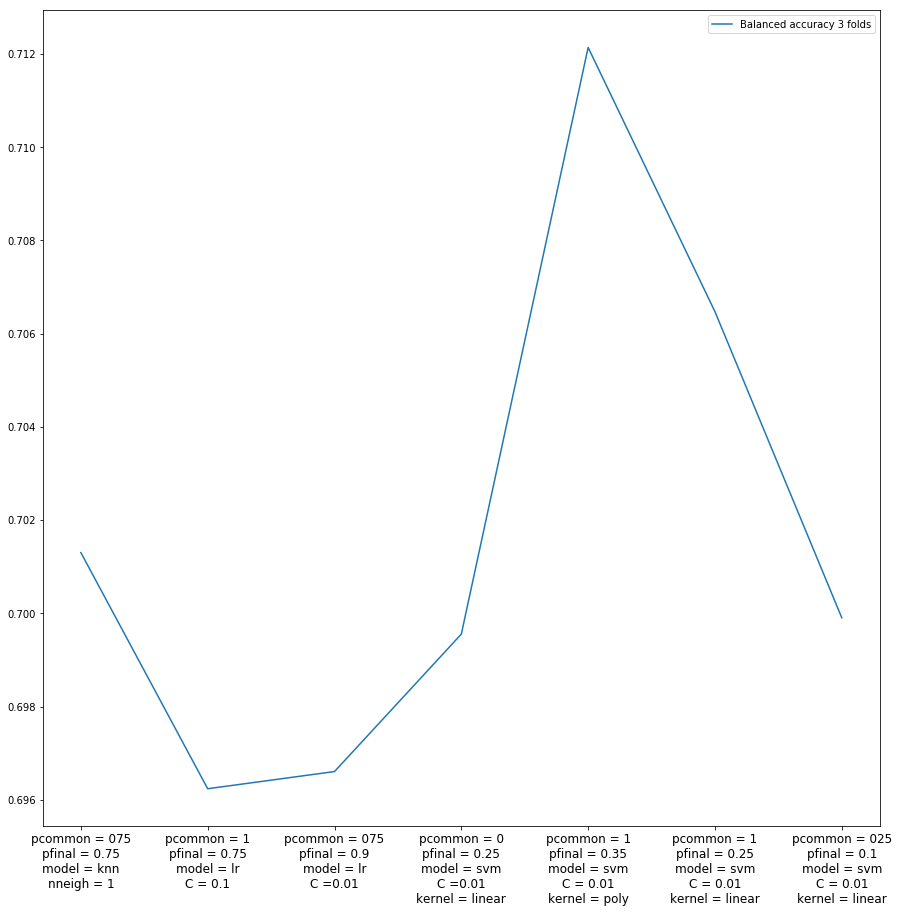

In [16]:
xs = range(0, len(to_print.keys()))
ys = to_print.values()
labels = to_print.keys()
labels = [str.join( "\n" , x.split("_")) for x in labels]
plt.figure(figsize=(15,15))
plt.plot(xs,ys, label='Balanced accuracy 3 folds')
plt.xticks(xs, labels)
plt.xticks(fontsize=12)
plt.legend()
# plt.annotate()
plt.show()

In [20]:
from sklearn.metrics import f1_score, balanced_accuracy_score, recall_score, precision_score
def calc_metrics_t_sybils(t):
    prev = df_train['expected'].values
    pred_t = np.where(df_train['rank'].values > t, 1, 0)
    
    #invertendo classes
    
    #prev = np.logical_not(prev).as+type(int)
    #pred_t = np.logical_not(pred_t).astype(int)
    
    compare = zip(pred_t, prev)
    
    recall = recall_score(prev, pred_t)
    precision = precision_score(prev, pred_t)
    f1 = f1_score(prev, pred_t)
    ba = balanced_accuracy_score(prev, pred_t)
    
    return np.array([recall, precision, f1, ba])
    


In [21]:
model_evaluation = {}

In [22]:
#files = ['steam_0_0_model_lr_C_0.01.realrank']

In [ ]:
for f in files:
    df_train = pd.read_csv(base_dir+"steam.train", sep=' ', header=None, index_col=0, names=['expected']).sort_index()
    df_rank = pd.read_csv(base_dir+f, sep=' ', header=None, index_col=0, names=['rank'], skiprows=1).sort_index()
    df_train = df_train.join(df_rank)
    metrics = pd.DataFrame(columns=['recall', 'precision', 'f-measure', 'balanced accuracy'])
    for t in range(0, 80, 1):
        i = t*0.001
        metrics.loc[i, :] = calc_metrics_t_sybils(i)
    max_f1 = np.max(metrics['balanced accuracy'])
    print(f,max_f1)
    model_evaluation[f] = max_f1

('steam_1_0.35_model_knn_nneigh_1.realrank', 0.6939650523136662)
('steam_075_0.25_model_knn_nneigh_1.realrank', 0.6904055657426383)
('steam_025_0.9_model_svm_C_0.01_kernel_linear.realrank', 0.6953403084888361)
('steam_1_0.5_model_svm_C_1_kernel_linear.realrank', 0.6948549239564232)
('steam_1_0.35_model_svm_C_1_kernel_rbf.realrank', 0.688477510516665)
('steam_1_1_model_svm_C_0.1_kernel_poly.realrank', 0.5009842519685039)
('steam_1_1_model_svm_C_1_kernel_rbf.realrank', 0.7941834753532521)
('steam_05_0.75_model_svm_C_1_kernel_linear.realrank', 0.7445394240103549)
('steam_075_0.5_model_svm_C_1_kernel_rbf.realrank', 0.6920235141840146)
('steam_1_0.9_model_svm_C_0.1_kernel_linear.realrank', 0.7686333728831841)
('steam_025_0.35_model_knn_nneigh_7.realrank', 0.6849045410419587)
('steam_1_0_model_svm_C_0.01_kernel_rbf.realrank', 0.6899741128249379)
('steam_05_0.1_model_knn_nneigh_7.realrank', 0.6864685578686225)
('steam_1_0.1_model_svm_C_0.01_kernel_poly.realrank', 0.6914707151332111)
('steam_1

/home/caio/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/caio/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


('steam_05_0_model_svm_C_0.1_kernel_poly.realrank', 0.5)
('steam_1_0.9_model_svm_C_0.1_kernel_rbf.realrank', 0.6925088987164276)
('steam_1_0.75_model_svm_C_0.1_kernel_rbf.realrank', 0.6948684068601014)
('steam_075_0.75_model_svm_C_1_kernel_poly.realrank', 0.6928190055010247)
('steam_075_0.75_model_svm_C_0.1_kernel_linear.realrank', 0.7262700895264804)
('steam_075_0.1_model_svm_C_1_kernel_rbf.realrank', 0.6850528529824182)
('steam_1_0.25_model_svm_C_0.1_kernel_poly.realrank', 0.6466265774997304)
('steam_025_0.75_model_lr_C_0.01.realrank', 0.6867921475568979)
('steam_025_0.75_model_svm_C_0.1_kernel_poly.realrank', 0.5)
('steam_0_1_model_knn_nneigh_7.realrank', 0.6367840578146909)
('steam_025_0.35_model_lr_C_0.1.realrank', 0.687304497896667)
('steam_0_0.25_model_svm_C_1_kernel_rbf.realrank', 0.6874528098371264)
('steam_05_0.5_model_lr_C_0.01.realrank', 0.687304497896667)
('steam_1_0.5_model_lr_C_0.1.realrank', 0.6878168482364362)
('steam_1_0.5_model_svm_C_0.01_kernel_poly.realrank', 0.693

('steam_05_0.75_model_knn_nneigh_7.realrank', 0.6957043468881459)
('steam_075_0.35_model_svm_C_1_kernel_rbf.realrank', 0.6895022111962033)
('steam_1_0_model_svm_C_1_kernel_rbf.realrank', 0.6899336641139036)
('steam_025_0.9_model_knn_nneigh_3.realrank', 0.7460495092223061)
('steam_0_0.9_model_svm_C_0.01_kernel_rbf.realrank', 0.6925763132348183)
('steam_025_0.1_model_svm_C_0.1_kernel_linear.realrank', 0.6874528098371264)
('steam_075_0.35_model_knn_nneigh_1.realrank', 0.6929673174414842)
('steam_0_0.75_model_lr_C_0.1.realrank', 0.7004907776938841)
('steam_025_0.5_model_knn_nneigh_3.realrank', 0.6942886420019416)
('steam_025_0.9_model_lr_C_1.realrank', 0.7539100420666596)
('steam_025_0.25_model_knn_nneigh_1.realrank', 0.688989860856434)
('steam_1_0.1_model_svm_C_0.1_kernel_rbf.realrank', 0.6865899040017258)
('steam_025_0.75_model_svm_C_1_kernel_poly.realrank', 0.6789990292309351)
('steam_1_0.75_model_svm_C_0.01_kernel_linear.realrank', 0.699277316362852)
('steam_025_0_model_knn_nneigh_7.re

In [ ]:
import operator
best_scores = sorted(model_evaluation.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
best_scores

In [ ]:
import matplotlib.pyplot as plt
def plt_metrics(metrics, modelf):
    xs = metrics.index
    ys = metrics.columns
    plt.figure(figsize=(15,9))
    for y in ys:
        plt.plot(xs,metrics[y], label=y)
        plt.legend()
    max_ba = np.max(metrics['f-measure'])
    max_th = metrics['f-measure'].astype(float).idxmax()
    plt.annotate(round(max_ba,2), (max_th, max_ba), xytext=(max_th, max_ba + 0.01), arrowprops=dict(facecolor='black', shrink=0.01), horizontalalignment='center')
    plt.show()

In [ ]:
to_plot = []

for i in ['0', '025', '05', '075', '1']:
    for j in ['0', '1']:
        to_plot.append(['steam_{}_model_svm_C_0.01_kernel_linear.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_0.1_kernel_linear.realrank',.format(i + '_' + j)
        'steam_{}_model_svm_C_1_kernel_linear.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_0.01_kernel_rbf.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_0.1_kernel_rbf.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_1_kernel_rbf.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_0.01_kernel_poly.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_0.1_kernel_poly.realrank'.format(i + '_' + j),
        'steam_{}_model_svm_C_1_kernel_poly.realrank'.format(i + '_' + j)])


x_axis = ['Linear; C=0.01', 'RBF; C=0.01', 'Poly; C=0.01', 
          'Linear; C=0.1', 'RBF; C=0.1', 'Poly; C=0.1', 
          'Linear; C=1', 'RBF; C=1', 'Poly; C=1']

for f in to_plot:
    y = []
    for j in f:
        df_train = pd.read_csv(base_dir+"steam.train", sep=' ', header=None, index_col=0, names=['expected']).sort_index()
        df_rank = pd.read_csv(base_dir+f, sep=' ', header=None, index_col=0, names=['rank']).sort_index()
        df_train = df_train.join(df_rank)
        y.append(calc_metrics_t_sybils(0.5)[2])
    plt.plot(x_axis,y)



In [ ]:
to_plot = [
    'steam_0_0.95_model_knn_nneigh_1.realrank',
    'steam_1_0.95_model_svm_C_1_kernel_poly.realrank',
    'steam_0_0.95_model_svm_C_1_kernel_linear.realrank',.
    'steam_0_0.95_model_lr.realrank'
]
for f in to_plot:
    df_train = pd.read_csv(base_dir+"steam.train", sep=' ', header=None, index_col=0, names=['expected']).sort_index()
    df_rank = pd.read_csv(base_dir+f, sep=' ', header=None, index_col=0, names=['rank']).sort_index()
    df_train = df_train.join(df_rank)
    metrics = pd.DataFrame(columns=['recall', 'precision', 'f-measure', 'balanced accuracy'])
    for t in range(0, 80, 1):
        i = t*0.001
        metrics.loc[i, :] = calc_metrics_t_sybils(i)
    plt_metrics(metrics, f)